In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('./data/delhi_cleaned.csv')

In [4]:
df.head() 

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Furnished_status,type_of_building,Price_sqft,log_price,has_parking,has_lift,is_new
0,5600000.0,1350.0,28.608850,77.460560,3,3,0,Unknown,Flat,4148.148148,15.538277,0,1,1
1,8800000.0,1490.0,28.374236,76.952416,3,3,0,Semi-Furnished,Flat,5906.040268,15.990262,0,1,1
2,16500000.0,2385.0,28.645769,77.385110,4,5,0,Unfurnished,Flat,6918.238994,16.618871,1,0,1
3,3810000.0,1050.0,28.566914,77.436434,2,2,3,Unfurnished,Flat,3628.571429,15.153140,1,1,1
4,6200000.0,1350.0,28.520732,77.356491,2,2,3,Unknown,Flat,4592.592593,15.640060,1,1,0


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df_copy = df.copy() 

In [7]:
df_copy

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Furnished_status,type_of_building,Price_sqft,log_price,has_parking,has_lift,is_new
0,5600000.0,1350.0,28.608850,77.460560,3,3,0,Unknown,Flat,4148.148148,15.538277,0,1,1
1,8800000.0,1490.0,28.374236,76.952416,3,3,0,Semi-Furnished,Flat,5906.040268,15.990262,0,1,1
2,16500000.0,2385.0,28.645769,77.385110,4,5,0,Unfurnished,Flat,6918.238994,16.618871,1,0,1
3,3810000.0,1050.0,28.566914,77.436434,2,2,3,Unfurnished,Flat,3628.571429,15.153140,1,1,1
4,6200000.0,1350.0,28.520732,77.356491,2,2,3,Unknown,Flat,4592.592593,15.640060,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,7900000.0,1095.0,28.635272,77.370395,2,2,0,Unknown,Flat,7214.611872,15.882373,0,0,0
7699,4510000.0,1060.0,28.581431,77.452819,2,2,3,Semi-Furnished,Flat,4254.716981,15.321808,0,0,0
7700,7000000.0,1898.0,28.625850,77.435336,4,3,5,Unknown,Flat,3688.092729,15.761421,0,0,0
7701,6500000.0,1400.0,28.701622,77.430153,3,3,2,Unknown,Flat,4642.857143,15.687313,1,1,0


In [8]:
df_copy['type_of_building'].value_counts()

type_of_building
Flat                6192
Individual House    1511
Name: count, dtype: int64

In [9]:
df_copy['type_of_building'] = df_copy['type_of_building'].apply(lambda x: 0 if x == "Flat" else 1)

In [10]:
y = df_copy['log_price']

In [11]:
df_copy['Furnished_status'].value_counts()

Furnished_status
Unknown           3589
Semi-Furnished    2193
Unfurnished       1228
Furnished          693
Name: count, dtype: int64

In [12]:
df_copy['type_of_building'].value_counts()

type_of_building
0    6192
1    1511
Name: count, dtype: int64

In [13]:
from sklearn.cluster import KMeans

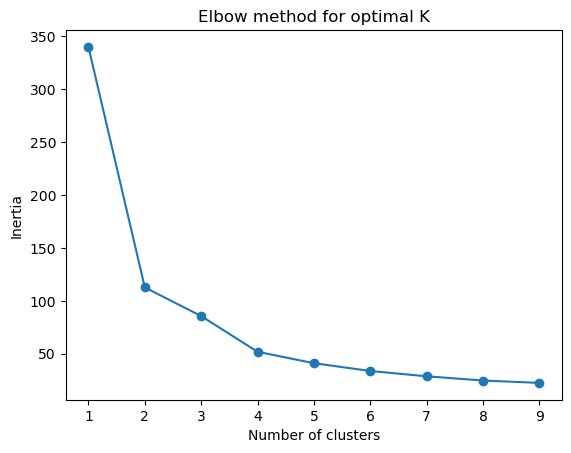

In [14]:
inertia = [] 
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_copy[['latitude','longitude']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal K')
plt.show() 

In [15]:
coords = df[['latitude','longitude']]
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_copy['location_cluster'] = kmeans.fit_predict(coords)

In [16]:
df_copy.head() 

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Furnished_status,type_of_building,Price_sqft,log_price,has_parking,has_lift,is_new,location_cluster
0,5600000.0,1350.0,28.608850,77.460560,3,3,0,Unknown,0,4148.148148,15.538277,0,1,1,1
1,8800000.0,1490.0,28.374236,76.952416,3,3,0,Semi-Furnished,0,5906.040268,15.990262,0,1,1,2
2,16500000.0,2385.0,28.645769,77.385110,4,5,0,Unfurnished,0,6918.238994,16.618871,1,0,1,1
3,3810000.0,1050.0,28.566914,77.436434,2,2,3,Unfurnished,0,3628.571429,15.153140,1,1,1,1
4,6200000.0,1350.0,28.520732,77.356491,2,2,3,Unknown,0,4592.592593,15.640060,1,1,0,1


In [17]:
df_copy['location_cluster'].value_counts()

location_cluster
1    4807
2    1809
0    1087
Name: count, dtype: int64

In [18]:
df_copy.drop(['latitude','longitude'],axis=1,inplace=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [35]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7703 non-null   float64
 1   area              7703 non-null   float64
 2   latitude          7703 non-null   float64
 3   longitude         7703 non-null   float64
 4   Bedrooms          7703 non-null   int64  
 5   Bathrooms         7703 non-null   int64  
 6   Balcony           7703 non-null   int64  
 7   Furnished_status  7703 non-null   object 
 8   type_of_building  7703 non-null   object 
 9   Price_sqft        7703 non-null   float64
 10  log_price         7703 non-null   float64
 11  has_parking       7703 non-null   int64  
 12  has_lift          7703 non-null   int64  
 13  is_new            7703 non-null   int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 842.6+ KB


In [20]:
df_copy['type_of_building'].value_counts()

type_of_building
0    6192
1    1511
Name: count, dtype: int64

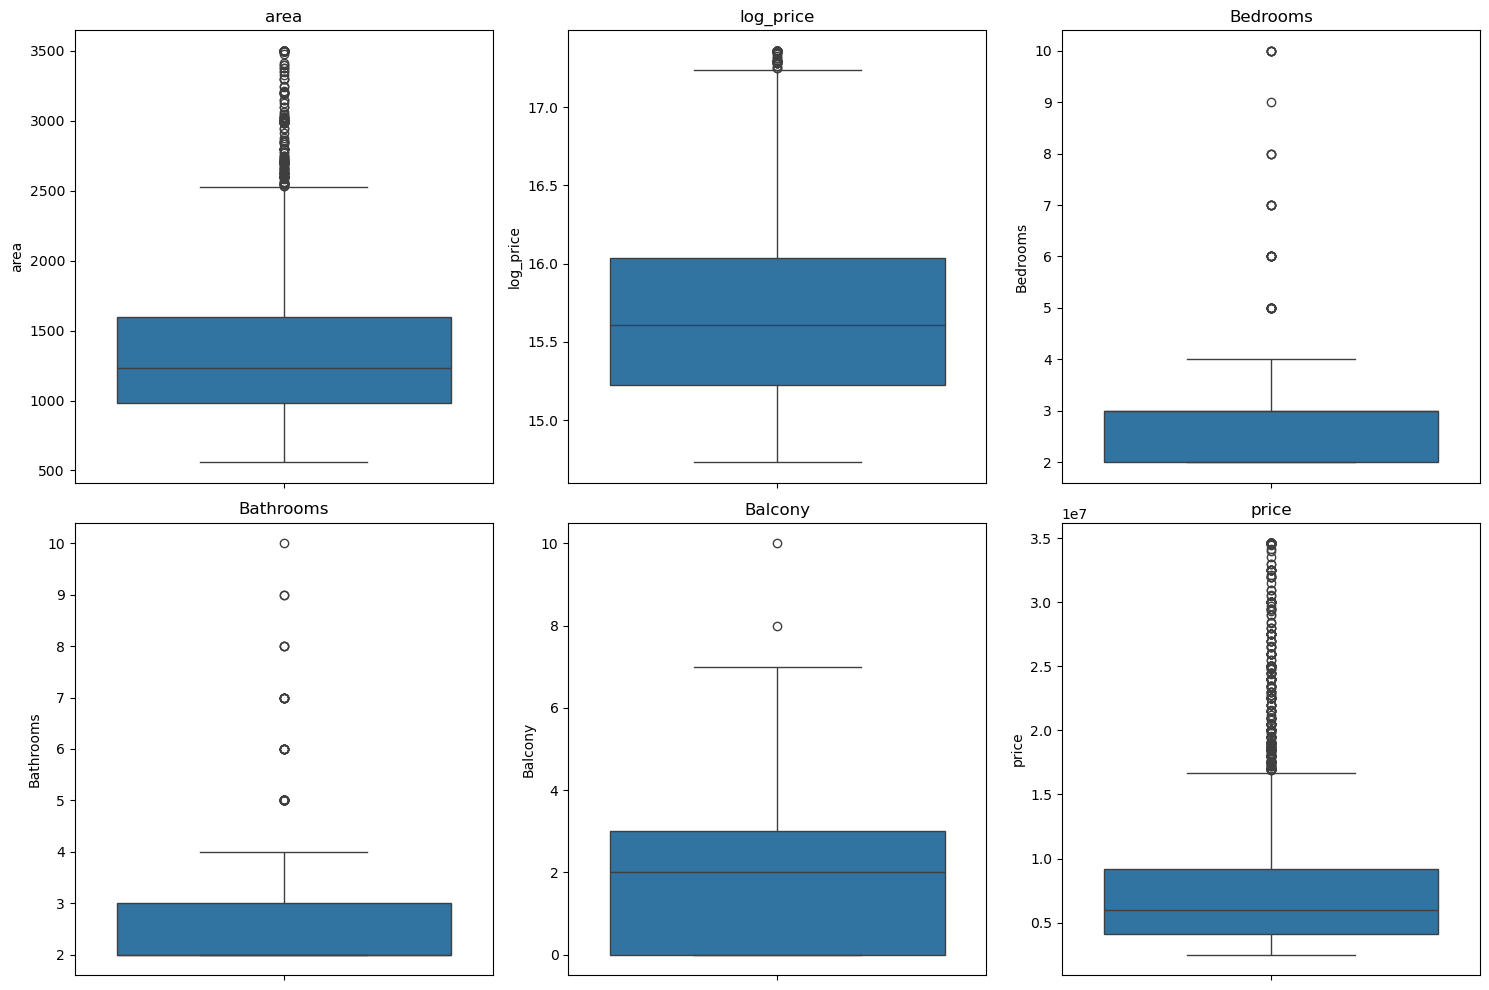

In [97]:
num_cols = ['area','log_price','Bedrooms','Bathrooms','Balcony','price']
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

for idx, col in enumerate(num_cols):
    ax = axes.flatten()[idx]
    sns.boxplot(y=df_copy[col], ax=ax)
    ax.set_title(col)

# Hide unused axes
for idx in range(len(num_cols), n_rows * n_cols):
    axes.flatten()[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
df_copy[df_copy['log_price'] > 17.25].sort_values(by='price',ascending=False)

,price,area,Bedrooms,Bathrooms,Balcony,Furnished_status,type_of_building,Price_sqft,log_price,has_parking,has_lift,is_new,location_cluster
6583,85000000.0,5330.0,5,5,5,Unknown,0,15947.467167,18.258162,1,1,0,2
6605,82500000.0,5330.0,5,6,4,Unknown,1,15478.424015,18.228309,1,1,0,2
95,82000000.0,5495.0,5,6,2,Unknown,0,14922.656961,18.222230,1,1,0,2
43,80000000.0,5571.0,5,5,3,Unknown,1,14360.078980,18.197537,1,1,0,2
197,79000000.0,7200.0,5,6,4,Unknown,0,10972.222222,18.184958,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,32000000.0,2500.0,3,3,3,Semi-Furnished,1,12800.000000,17.281246,1,1,0,0
7633,32000000.0,3325.0,4,4,4,Unfurnished,0,9624.060150,17.281246,0,0,0,1
7065,31900000.0,3557.0,5,6,5,Unknown,0,8968.231656,17.278117,0,0,0,2
2868,31500000.0,3100.0,3,4,3,Semi-Furnished,0,10161.290323,17.265498,1,0,0,2


In [ ]:
# Capping the columns bedrooms bathrooms and balcony where i removed all the columns where the type of building was flat but it still had more than 5 rooms which is unusual
df_copy = df_copy[~(
    (df_copy['type_of_building'] == 0) & 
    ((df_copy['Bedrooms'] > 4) | (df_copy['Bathrooms'] > 4) | (df_copy['Balcony'] > 7))
)]

In [71]:
df_copy.drop(['Price_sqft'],axis=1,inplace=True)

In [91]:
# Handling Outliers 
# Capping 
def cap_outliers(df,cols,lower=0.01,upper=0.99):
    for col in cols:
        lower_bound = df[col].quantile(lower)
        upper_bound = df[col].quantile(upper)
        df[col] = np.clip(df[col],lower_bound, upper_bound)

    return df 

In [92]:
# Define Features 
num_features = ['area','Bedrooms','Bathrooms','Balcony']
cat_features = ['Furnished_status','location_cluster']
bin_features = ['has_parking','has_lift','is_new','type_of_building']

In [103]:
# Transformers 
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

outlier_cols = ['log_price','area','price']

outlier_capper = FunctionTransformer(
    lambda X: cap_outliers(X.copy(),outlier_cols),
    validate=False
)

df_copy = outlier_capper.fit_transform(df_copy)

numeric_transformer = RobustScaler()

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers = [
        ('cat',categorical_transformer,cat_features),
        ('num',numeric_transformer,num_features),
        ('bin','passthrough',bin_features)
    ]
)



In [104]:
X = df_copy[num_features + cat_features + bin_features]
y = df_copy['log_price']

In [106]:
X = preprocessor.fit_transform(X)

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [108]:
# Fit the model 
lr = LinearRegression() 
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [109]:
y_pred = lr.predict(X_test)

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [111]:
def evalute_model(test,predicted):
    mae = mean_absolute_error(test,predicted)
    mse = mean_squared_error(test,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(test,predicted)
    # print(f"Mean Absolute Error: {mae*100}\nMean Squared Error: {mse*100}\nRoot Mean Squared Error: {rmse*100}\nR2 Score: {r2*100}")
    return mae,rmse,r2

In [112]:
evalute_model(y_test,y_pred)

(0.22525293983491335, np.float64(0.2857640019230893), 0.7616483778074644)

### Creating all linear models pipeline 

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [113]:
poly_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("regressor", LinearRegression())
])

In [114]:
models = {
    "LinearRegression": LinearRegression(),
    "PolynomialRegression": poly_pipeline,
    "Ridge": Ridge(alpha=1.0),
    "RidgeCV": RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5),
    "Lasso": Lasso(alpha=0.01, max_iter=5000),
    "LassoCV": LassoCV(alphas=[0.001, 0.01, 0.1, 1], cv=5, max_iter=5000),
    "ElasticNet": ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000),
    "ElasticNetCV": ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1], l1_ratio=[0.2,0.5,0.8], cv=5, max_iter=5000)
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test) 

    model_mae, model_rmse, model_r2 = evalute_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance')
    print("- Root Mean Squared Error: {:.4f}".format(model_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_mae))
    print("- R2 Score: {:.4f}".format(model_r2))

    print('-'*35)

    r2_list.append(model_r2)

    print('='*35)
    print('\n')

LinearRegression
Model performance
- Root Mean Squared Error: 0.2858
- Mean Absolute Error: 0.2253
- R2 Score: 0.7616
-----------------------------------


PolynomialRegression
Model performance
- Root Mean Squared Error: 0.2650
- Mean Absolute Error: 0.2105
- R2 Score: 0.7951
-----------------------------------


Ridge
Model performance
- Root Mean Squared Error: 0.2858
- Mean Absolute Error: 0.2253
- R2 Score: 0.7616
-----------------------------------


RidgeCV
Model performance
- Root Mean Squared Error: 0.2859
- Mean Absolute Error: 0.2254
- R2 Score: 0.7615
-----------------------------------


Lasso
Model performance
- Root Mean Squared Error: 0.2898
- Mean Absolute Error: 0.2294
- R2 Score: 0.7548
-----------------------------------


LassoCV
Model performance
- Root Mean Squared Error: 0.2859
- Mean Absolute Error: 0.2255
- R2 Score: 0.7614
-----------------------------------


ElasticNet
Model performance
- Root Mean Squared Error: 0.2879
- Mean Absolute Error: 0.2276
- R2 Sc

In [115]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
1,PolynomialRegression,0.795057
0,LinearRegression,0.761648
2,Ridge,0.761633
3,RidgeCV,0.761484
7,ElasticNetCV,0.761473
5,LassoCV,0.761410
6,ElasticNet,0.758095
4,Lasso,0.754835
